In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv (r'C:\Users\Zeus\Dropbox\My PC (DESKTOP-QHM8Q9B)\Downloads\TO BE DELETED LATER\.ipynb_checkpoints\archive\ACM Data base.csv')


In [4]:
print (df)

             asin               name  rating                date  verified  \
0      B0000SX2UC              Janet       3    October 11, 2005     False   
1      B0000SX2UC         Luke Wyatt       1     January 7, 2004     False   
2      B0000SX2UC             Brooke       5   December 30, 2003     False   
3      B0000SX2UC      amy m. teague       3      March 18, 2004     False   
4      B0000SX2UC      tristazbimmer       4     August 28, 2005     False   
...           ...                ...     ...                 ...       ...   
67981  B081H6STQQ              jande       5     August 16, 2019     False   
67982  B081H6STQQ            2cool4u       5  September 14, 2019     False   
67983  B081H6STQQ              simon       5       July 14, 2019     False   
67984  B081TJFVCJ  Tobiasz Jedrysiak       5   December 24, 2019      True   
67985  B0825BB7SG      Owen Gonzalez       5   December 11, 2019     False   

                                                   title  \
0  

In [15]:
# Performing Sentiment analysis

In [16]:
# External libraries used Textblob

In [5]:
!pip install TextBlob

In [6]:
from textblob import TextBlob

In [19]:
text = df('body')[5]
text

TypeError: 'DataFrame' object is not callable

In [7]:
print (df)

             asin               name  rating                date  verified  \
0      B0000SX2UC              Janet       3    October 11, 2005     False   
1      B0000SX2UC         Luke Wyatt       1     January 7, 2004     False   
2      B0000SX2UC             Brooke       5   December 30, 2003     False   
3      B0000SX2UC      amy m. teague       3      March 18, 2004     False   
4      B0000SX2UC      tristazbimmer       4     August 28, 2005     False   
...           ...                ...     ...                 ...       ...   
67981  B081H6STQQ              jande       5     August 16, 2019     False   
67982  B081H6STQQ            2cool4u       5  September 14, 2019     False   
67983  B081H6STQQ              simon       5       July 14, 2019     False   
67984  B081TJFVCJ  Tobiasz Jedrysiak       5   December 24, 2019      True   
67985  B0825BB7SG      Owen Gonzalez       5   December 11, 2019     False   

                                                   title  \
0  

In [8]:
text = df['title'][6]
text

'Wanna cool Nokia? You have it here!'

In [9]:
TextBlob(text).sentiment.polarity


0.4375

In [10]:
polarity=[]

for i in df['title']:
    try:
         polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)
        

In [11]:
len(polarity)

67986

In [12]:
data = df.copy()

In [13]:
data['Polarity']= polarity

In [14]:
data.head()

asin           name  rating               date  verified  \
0  B0000SX2UC          Janet       3   October 11, 2005     False   
1  B0000SX2UC     Luke Wyatt       1    January 7, 2004     False   
2  B0000SX2UC         Brooke       5  December 30, 2003     False   
3  B0000SX2UC  amy m. teague       3     March 18, 2004     False   
4  B0000SX2UC  tristazbimmer       4    August 28, 2005     False   

                                          title  \
0                   Def not best, but not worst   
1                   Text Messaging Doesn't Work   
2                               Love This Phone   
3                       Love the Phone, BUT...!   
4  Great phone service and options, lousy case!   

                                                body  helpfulVotes  Polarity  
0  I had the Samsung A600 for awhile which is abs...           1.0    0.0000  
1  Due to a software issue between Nokia and Spri...          17.0    0.0000  
2  This is a great, reliable phone. I also purcha...           5.0    0.5000  
3  I love the phone and all, because I really did...           1.0    0.6250  
4  The phone has been great for every purpose it ...           1.0    0.0875

In [15]:
# EDA for positive 

In [16]:
data_positive = data[data['Polarity']>0]

In [17]:
data_positive.shape

(31959, 9)

In [18]:
# Installing word cloud

In [19]:
!pip install wordcloud

In [20]:
from wordcloud import WordCloud,STOPWORDS

In [21]:
stopwords=set(STOPWORDS)

In [22]:
data_positive.head()

asin                        name  rating                date  \
2  B0000SX2UC                      Brooke       5   December 30, 2003   
3  B0000SX2UC               amy m. teague       3      March 18, 2004   
4  B0000SX2UC               tristazbimmer       4     August 28, 2005   
5  B0000SX2UC                    J. White       4  September 25, 2005   
6  B0000SX2UC  the cell phone store owner       5      April 16, 2004   

   verified                                         title  \
2     False                               Love This Phone   
3     False                       Love the Phone, BUT...!   
4     False  Great phone service and options, lousy case!   
5     False                           Worked great for me   
6     False           Wanna cool Nokia? You have it here!   

                                                body  helpfulVotes  Polarity  
2  This is a great, reliable phone. I also purcha...           5.0    0.5000  
3  I love the phone and all, because I really did...           1.0    0.6250  
4  The phone has been great for every purpose it ...           1.0    0.0875  
5  Hello, I have this phone and used it until I d...           NaN    0.8000  
6  Cool. Cheap. Color: 3 words that describe the ...           2.0    0.4375

In [23]:
total_text = (' '.join(data_positive['title']))

In [24]:
len(total_text)

910284

In [25]:
import re
total_text =re.sub('[^a-zA-Z]',' ',total_text)

In [26]:
total_text=re.sub(' +',' ',total_text)

In [27]:
total_text[0:10000]

'Love This Phone Love the Phone BUT Great phone service and options lousy case Worked great for me Wanna cool Nokia You have it here cool phone works great but don t dropt it Worth paying more for something else Great free phone for Sprint customers I love it Excellent product Nice but Awesome with a But Is cheap but ok quality simply great More than great Good little phone Great phone Perfect Bare Bones and Practically Indestructible Phone Great disposible phone Good boost phone good phone Great Phone For a basic phone quite good Excellent Choice Cell Phone Great phone GREAT PHONE ok as phone that s it Good phone good price IT IS OKAY it is her third one like it This one is perfect for her old fashioned Old phone may not work with a new SIM card Great simple phone Ok phone to tide me over Good basic phone for the money I like it but a few shortcomings are significant enough that I wouldn t buy it again if I lost it Not an upgrade over original Alias Good Phone that could use a few twe

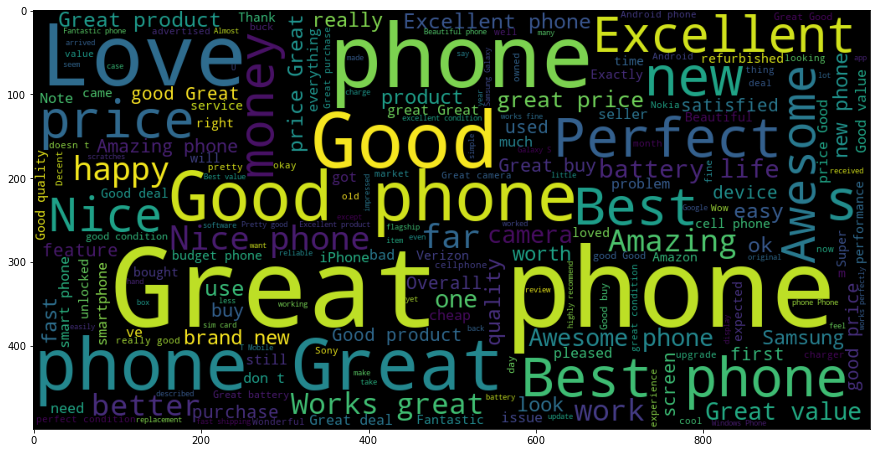

In [28]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)

In [29]:
total_text=re.sub('phone',' ',total_text)

In [30]:
total_text=re.sub(' +',' ',total_text)

(-0.5, 999.5, 499.5, -0.5)

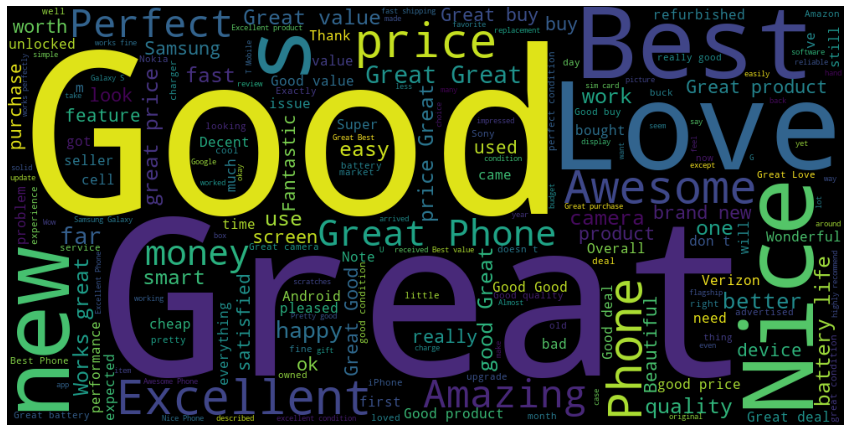

In [31]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')

In [32]:
data_negitive = data[data['Polarity']<0]

In [33]:
data_negitive.head()

asin              name  rating               date  verified  \
9   B0000SX2UC   Amazon Customer       3   February 2, 2004     False   
11  B0000SX2UC  Zachary O. Toups       1  November 29, 2004     False   
14  B0009N5L7K     Marcel Thomas       1      March 5, 2016      True   
31  B000SKTZ0S        zzzzzzzzzz       5     April 10, 2008     False   
43  B001AO4OUC         Elizabeth       4       May 12, 2009      True   

                                           title  \
9                        Pissed off-a little bit   
11  Slow, annoying, fragile, heavy, and bulky...   
14                                  Stupid phone   
31                                   Tough phone   
43                            tough little phone   

                                                 body  helpfulVotes  Polarity  
9   ok well im in school and i need the text messa...           3.0 -0.187500  
11  1.) Slow - If you want to check your missed ca...           4.0 -0.325000  
14                           DON'T BUY OUT OF SERVICE           NaN -0.800000  
31  We never use cell phones, but thought we neede...           NaN -0.388889  
43  This phone isn't kidding when it says military...           1.0 -0.288194

In [34]:
total_text = (' '.join(data_negitive['title']))

In [35]:
total_text =re.sub('[^a-zA-Z]',' ',total_text)

In [36]:
total_text=re.sub(' +',' ',total_text)

In [37]:
total_text=re.sub('phone',' ',total_text)

In [38]:
total_text=re.sub('good',' ',total_text)

In [39]:
total_text=re.sub(' +',' ',total_text)

(-0.5, 999.5, 499.5, -0.5)

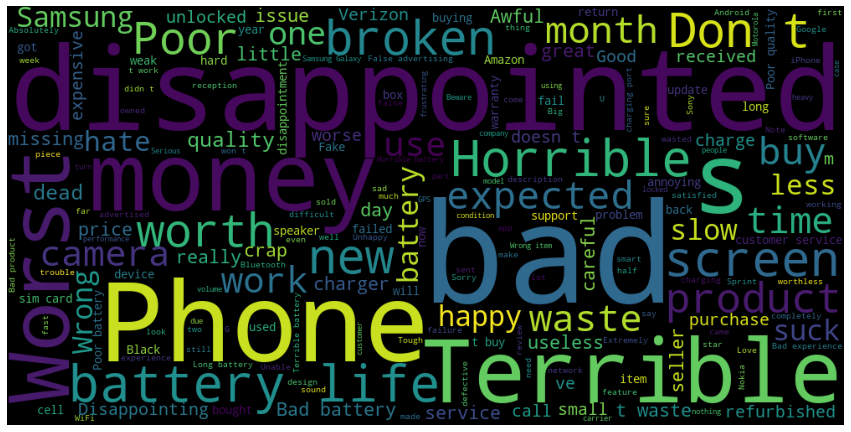

In [40]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')

In [41]:
df['asin'].nunique()

720

In [42]:
raw=df.groupby('asin').agg({'title':'count','body':'count','helpfulVotes':'count','rating':'mean'}).sort_values(by='title',ascending=False)

In [43]:
raw

title  body  helpfulVotes    rating
asin                                           
B00F2SKPIM    981   981           346  4.306830
B00836Y6B2    925   925           287  3.474595
B07FZH9BGV    790   791           287  4.035398
B01D1J9BGU    775   774           276  3.681290
B07WSJYDXX    773   773           332  3.869340
...           ...   ...           ...       ...
B07N7SC1HK      1     1             1  5.000000
B07MNZWW37      1     1             1  4.000000
B07XJ5RSX3      1     1             1  5.000000
B079TZJF9F      1     1             0  2.000000
B0825BB7SG      1     1             0  5.000000

[720 rows x 4 columns]

In [44]:
raw.columns=['No.products purchased','No. of reviews','Upvotes','Avg rating']

In [45]:
raw

No.products purchased  No. of reviews  Upvotes  Avg rating
asin                                                                  
B00F2SKPIM                    981             981      346    4.306830
B00836Y6B2                    925             925      287    3.474595
B07FZH9BGV                    790             791      287    4.035398
B01D1J9BGU                    775             774      276    3.681290
B07WSJYDXX                    773             773      332    3.869340
...                           ...             ...      ...         ...
B07N7SC1HK                      1               1        1    5.000000
B07MNZWW37                      1               1        1    4.000000
B07XJ5RSX3                      1               1        1    5.000000
B079TZJF9F                      1               1        0    2.000000
B0825BB7SG                      1               1        0    5.000000

[720 rows x 4 columns]

In [46]:
user_10=raw.index[0:10]

In [47]:
num_10=raw['No.products purchased'][0:10]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

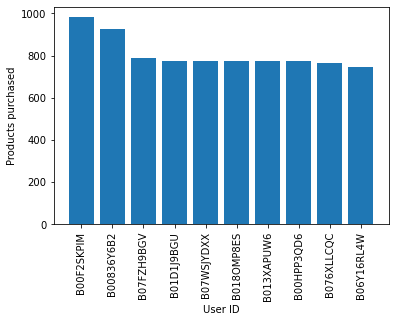

In [48]:
plt.bar(user_10,num_10,label='Most Recommended users')
plt.xlabel('User ID')
plt.ylabel('Products purchased')
plt.xticks(rotation='vertical')



In [49]:
df.sample(n=2000)

asin                   name  rating                date  \
54895  B07K1M36CM              Mónica C.       5  September 23, 2019   
36283  B071ZDQ6MV              Jim Power       2    October 24, 2017   
14657  B00OZTSY6Y               Techguru       4     January 7, 2015   
20827  B01CJ3SCJ6        Amazon Customer       5   December 11, 2016   
36011  B071ZDQ6MV                   Nick       3        June 7, 2018   
...           ...                    ...     ...                 ...   
53677  B07HQTWQVT           James Chiang       1        June 1, 2018   
3337   B008PAW5EQ        Amazon Customer       1   September 1, 2013   
11825  B00LAEA84S             Michael B.       5   December 22, 2014   
61785  B07QCXPP71  Dissatisfied consumer       4   September 3, 2019   
27841  B01MDMJGYT                Shaun R       5      April 17, 2017   

       verified                                              title  \
54895      True                                  Excellent phone!!   
36283      True       Don't expect too much for such a low price..   
14657      True  I'm uber-passionate about all things tech that...   
20827      True                                         Five Stars   
36011      True   Nice device but needs more customizable features   
...         ...                                                ...   
53677     False  This phone is so bad, I am totally glad I drop...   
3337      False                                Disappointing phone   
11825      True                                  All That and More   
61785      True                                        no chargers   
27841      True  Why pay twice as much for a less appealing phone?   

                                                    body  helpfulVotes  
54895  It’s a wonderful device! Very easy to configur...           NaN  
36283  Slow device, horrible camera, freezing screen ...           NaN  
14657  4.5 stars. Phone is everything I expected it t...          24.0  
20827                                       Great phone.           NaN  
36011  The phone looks really nice and feels even bet...           2.0  
...                                                  ...           ...  
53677  This phone is so bad, I am totally glad I drop...           8.0  
3337   This refurbished phone was a disappointment be...           1.0  
11825  Works very well. Looked a little crusty but so...           8.0  
61785  I have not received the correct plugs for the ...           1.0  
27841  Excellent modern phone at the right price and ...           3.0  

[2000 rows x 8 columns]

In [50]:
final=df[0:2000]

In [51]:
final.isnull().sum()

asin               0
name               0
rating             0
date               0
verified           0
title              0
body               0
helpfulVotes    1234
dtype: int64

In [52]:
final.duplicated().sum()

0

In [53]:
len(final['body'][0].split(' '))

327

In [54]:
def calc_len(body):
    return len(body.split(' '))
     

In [55]:
final['Text_length']=final['body'].apply(calc_len)

<ipython-input-55-e5d1d5634de8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Text_length']=final['body'].apply(calc_len)


In [56]:
!pip install plotly

In [57]:
import plotly.express as px

In [58]:
px.box(final,y='Text_length')

C:\Users\Zeus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='rating', ylabel='count'>

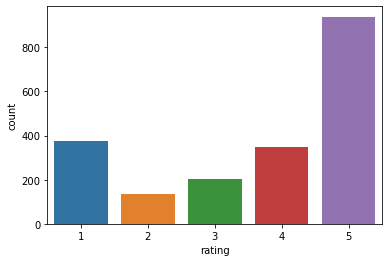

In [59]:
sns.countplot(final['rating'])

In [79]:
data=final['body'][0]
data

"I had the Samsung A600 for awhile which is absolute doo doo. You can read my review on it and detect my rage at the stupid thing. It finally died on me so I used this Nokia phone I bought in a garage sale for $1. I wonder y she sold it so cheap?... Bad: ===> I hate the menu. It takes forever to get to what you want because you have to scroll endlessly. Usually phones have numbered categories so u can simply press the # and get where you want to go. ===> It's a pain to put it on silent or vibrate. If you're in class and it rings, you have to turn it off immediately. There's no fast way to silence the damn thing. Always remember to put it on silent! I learned that the hard way. ===> It's so true about the case. It's a mission to get off and will break ur nails in the process. Also, you'll damage the case each time u try. For some reason the phone started giving me problems once I did succeed in opening it. ===> Buttons could be a bit bigger. Vibration could be stronger. Good: ===> Recep

In [62]:
punctuations='''.,/()[]=>;:'''
no_punc=''
data=final['body'][0]
for char in data:
    if char not in punctuations:
        no_punc=no_punc + char
no_punc        

"I had the Samsung A600 for awhile which is absolute doo doo You can read my review on it and detect my rage at the stupid thing It finally died on me so I used this Nokia phone I bought in a garage sale for $1 I wonder y she sold it so cheap? Bad  I hate the menu It takes forever to get to what you want because you have to scroll endlessly Usually phones have numbered categories so u can simply press the # and get where you want to go  It's a pain to put it on silent or vibrate If you're in class and it rings you have to turn it off immediately There's no fast way to silence the damn thing Always remember to put it on silent! I learned that the hard way  It's so true about the case It's a mission to get off and will break ur nails in the process Also you'll damage the case each time u try For some reason the phone started giving me problems once I did succeed in opening it  Buttons could be a bit bigger Vibration could be stronger Good  Reception is not too shabby I was using it in th

In [65]:
!pip install nltk

In [71]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Zeus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [72]:
from nltk.corpus import stopwords

In [73]:
re=[word for word in data.split(' ') if word not in set (stopwords.words('english'))]

str=''
for wd in re:
    str=str+wd
    str=str+' '
str    

"I Samsung A600 awhile absolute doo doo. You read review detect rage stupid thing. It finally died I used Nokia phone I bought garage sale $1. I wonder sold cheap?... Bad: ===> I hate menu. It takes forever get want scroll endlessly. Usually phones numbered categories u simply press # get want go. ===> It's pain put silent vibrate. If class rings, turn immediately. There's fast way silence damn thing. Always remember put silent! I learned hard way. ===> It's true case. It's mission get break ur nails process. Also, damage case time u try. For reason phone started giving problems I succeed opening it. ===> Buttons could bit bigger. Vibration could stronger. Good: ===> Reception shabby. I using elevator remarkable feat considering old phone would lose service simply putting pocket. ===> Compared old Samsung, phone works quite well. The ring tones loud enough hear phone actually charges quickly great battery life. It heat like potatoe oven either long phone convos. ===> Nice bright, large

In [76]:
def remove_stopwords(ACMDatabase):
    return ' ',join([word for word in ACMDatabase.split(' ') if word not in set (stopwords.words('english'))])

In [78]:
final['body']=final['body'].apply(remove_stopwords)

NameError: name 'join' is not defined

In [87]:
def remove_stopwords(ACMDatabase):
    return ' '.join([word for word in data.split(' ') if word not in set (stopwords.words('english'))])

In [88]:
final['body']=final['body'].apply(remove_stopwords)

<ipython-input-88-681d284fc7d8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [89]:
final['body'].str.contains('http').sum()

0

In [92]:
words=' '.join(final['body'])
stopwords= set (STOPWORDS)

(-0.5, 1999.5, 1499.5, -0.5)

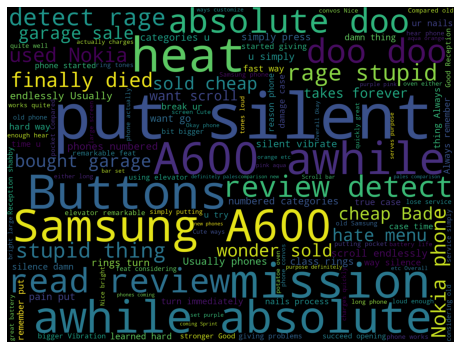

In [96]:
worldcloud=WordCloud (width=2000,height=1500,stopwords=stopwords).generate(Words)
plt.figure(figsize=(8,8))
plt.imshow(worldcloud)
plt.axis('off')

In [97]:
final['body'].str.contains('http').sum()

0

In [99]:
final['verified'].bool.contains('False').sum()

AttributeError: 'function' object has no attribute 'contains'

In [100]:
final['verified']==True

0       False
1       False
2       False
3       False
4       False
        ...  
1995     True
1996     True
1997     True
1998     True
1999     True
Name: verified, Length: 2000, dtype: bool

In [101]:
homepage_index = final['verified']==True

In [102]:
Final_final = final[homepage_index]
Final_final

asin               name  rating                date  verified  \
14    B0009N5L7K      Marcel Thomas       1       March 5, 2016      True   
17    B0009N5L7K     Stephen Cahill       1   December 20, 2016      True   
18    B0009N5L7K              Mihir       5   December 13, 2009      True   
21    B000SKTZ0S             Thomas       4  September 17, 2010      True   
22    B000SKTZ0S  Kei, San Jose, CA       1        May 13, 2017      True   
...          ...                ...     ...                 ...       ...   
1995  B00727AODC             kuicho       3        June 2, 2013      True   
1996  B00727AODC   HisGlory Majidah       3   December 31, 2013      True   
1997  B00727AODC            Delbert       5       June 13, 2012      True   
1998  B00727AODC          wilma wan       4   December 28, 2013      True   
1999  B00727AODC          Anthony P       5  September 16, 2014      True   

                                                  title  \
14                                         Stupid phone   
17                                        Phones locked   
18                                    Excellent product   
21                                            Nice, but   
22    It seems it doesn't work with the existing AT&...   
...                                                 ...   
1995                           Good but could be better   
1996                    couldnt get or receive pic msgs   
1997          Un Gran Windows Phone 7 rápido y compacto   
1998                                         nice phone   
1999           Great Looking and Fast...Very Pleased!!!   

                                                   body  helpfulVotes  \
14    I Samsung A600 awhile absolute doo doo. You re...           NaN   
17    I Samsung A600 awhile absolute doo doo. You re...           NaN   
18    I Samsung A600 awhile absolute doo doo. You re...           NaN   
21    I Samsung A600 awhile absolute doo doo. You re...           NaN   
22    I Samsung A600 awhile absolute doo doo. You re...           NaN   
...                                                 ...           ...   
1995  I Samsung A600 awhile absolute doo doo. You re...           1.0   
1996  I Samsung A600 awhile absolute doo doo. You re...           NaN   
1997  I Samsung A600 awhile absolute doo doo. You re...           2.0   
1998  I Samsung A600 awhile absolute doo doo. You re...           NaN   
1999  I Samsung A600 awhile absolute doo doo. You re...           NaN   

      Text_length  
14              5  
17             16  
18             32  
21            158  
22             51  
...           ...  
1995           75  
1996          110  
1997          149  
1998           45  
1999           40  

[1647 rows x 9 columns]

In [103]:
words=' '.join(Final_final['body'])
stopwords= set (STOPWORDS)

(-0.5, 1999.5, 1499.5, -0.5)

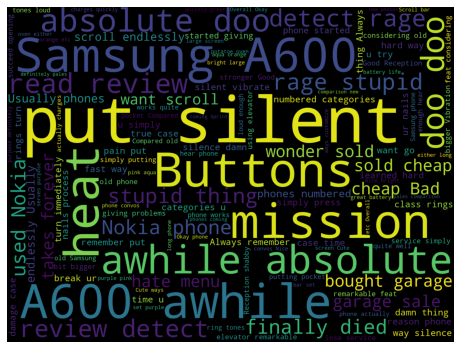

In [104]:
worldcloud=WordCloud (width=2000,height=1500,stopwords=stopwords).generate(Words)
plt.figure(figsize=(8,8))
plt.imshow(worldcloud)
plt.axis('off')